# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [3]:
for i, val in enumerate(cities):
    print (i,  val)

0 winnemucca
1 ushuaia
2 illoqqortoormiut
3 bluff
4 castro
5 seoul
6 hermanus
7 bengkulu
8 narsaq
9 busselton
10 fortuna
11 sitka
12 magrath
13 nizhneyansk
14 qaanaaq
15 rikitea
16 francistown
17 octeville
18 ariquemes
19 caravelas
20 wanning
21 kahului
22 arraial do cabo
23 kapaa
24 gelemso
25 tual
26 hoshangabad
27 sungairaya
28 binzhou
29 nazarovo
30 amderma
31 peruibe
32 tsihombe
33 taolanaro
34 butaritari
35 phalia
36 kodiak
37 ribeira grande
38 leningradskiy
39 atuona
40 cortez
41 helena
42 lubango
43 kaitangata
44 hobyo
45 urubicha
46 te anau
47 gurupi
48 belgrade
49 batagay-alyta
50 albany
51 klaksvik
52 haines junction
53 cap malheureux
54 ndele
55 candawaga
56 matsanga
57 aneho
58 georgetown
59 svetlogorsk
60 cidreira
61 puerto ayora
62 champerico
63 katsuura
64 porbandar
65 naze
66 mataura
67 funadhoo
68 upernavik
69 kaeo
70 barentsburg
71 avera
72 east london
73 manoharpur
74 flinders
75 punta arenas
76 touros
77 yellowknife
78 keelung
79 saldanha
80 lumut
81 jocotenango
82

In [4]:
unique_city = []
cloudy = []
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
wind = []

In [5]:
init_count = 0
add_count = 0

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#API call per city for weather check


    # setup url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
print('Data Retrieval')
print('--------------')


Data Retrieval
--------------


In [8]:

for city in cities:
    # add city url
    city_url = url + "&q=" + city
    print(city_url)

    response = requests.get(city_url).json()
    
    try:
        cloudy.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        unique_city.append(response['name'])
    
    except(KeyError):
        print("City not found!")

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')
  

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=winnemucca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=illoqqortoormiut
City not found!
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=seoul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef213

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=manoharpur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=keelung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=lumut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=grand river south east
City not found!
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=makaryev
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=abdulino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=leh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=zivinice
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad89656

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=olinda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=zeya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=miranorte
City not found!
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=rio gallegos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=novobirilyussy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=sharjah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=koumac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=boguchany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=malakal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=rocha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=batemans bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=kokopo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=jega

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=nalut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=chifeng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=bargal
City not found!
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=baykit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=santa rosalia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=sarh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=whitehorse
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=shirokiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=rockport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=takoradi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=maple creek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=ouesso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=tautira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=perelyub
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=ewa beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=la asuncion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=balakhta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=mitsamiouli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=galle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=kampot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=lufilufi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=pont-a-celles
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=alugan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=nsoko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=ostrowiec swietokrzyski
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=bettiah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=saint-pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=linxia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a70580b72d0f&q=tomatlan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad8965691e3673ef2133a7058

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
len(cloudy)

571

In [10]:
city_df = pd.DataFrame({"City": unique_city, 
                        "Cloudiness": cloudy, 
                        "Country": country, 
                        "Date": date, 
                        "Humidity":humidity,
                        "Lat": lat,
                        "Lng": lng,
                        "Max Temp": temp,
                        "Wind Speed": wind
                                         })

city_df = city_df.rename_axis('City ID')

city_df.head(50)


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Winnemucca,44,US,1611710713,80,40.9730,-117.7357,27.00,5.01
1,Ushuaia,75,AR,1611710461,75,-54.8000,-68.3000,39.20,19.57
2,Bluff,100,NZ,1611710713,50,-46.6000,168.3333,75.99,10.00
3,Castro,100,BR,1611710713,93,-24.7911,-50.0119,65.75,4.72
4,Seoul,0,KR,1611710609,44,37.5683,126.9778,37.40,8.05
5,Hermanus,69,ZA,1611710517,93,-34.4187,19.2345,62.01,3.33
6,Bengkulu,100,ID,1611710442,81,-3.8004,102.2655,76.10,1.90
7,Narsaq,0,GL,1611710667,78,60.9167,-46.0500,9.72,9.46
8,Busselton,11,AU,1611710714,71,-33.6500,115.3333,66.00,7.00


In [12]:
#city_df.to_csv("city_df.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

Per CSV review, no cities have humidity > 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

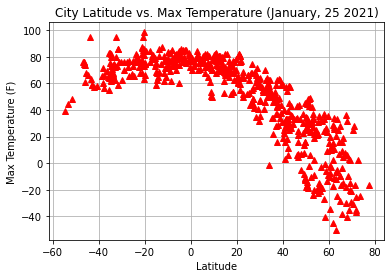

In [13]:
fig,ax = plt.subplots()
ax.grid()
# line,=plt.plot([0,1])
plt.plot(lat, temp, 'r^')
plt.title('City Latitude vs. Max Temperature (January, 25 2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

This graph is displaying the correlation between the city's latitude and the maximum temperature for January 25, 2021.  The cities at 0 latitude (the Earth's equator) have the maximum temperature.  The temperature decreases as the city moves further from the equator.

## Latitude vs. Humidity Plot

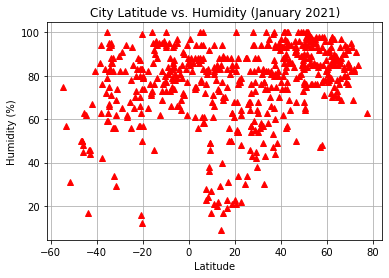

In [14]:
fig,ax = plt.subplots()
ax.grid()
plt.plot(lat, humidity, 'r^')
plt.title('City Latitude vs. Humidity (January 2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.show()

This graph is displaying the correlation between the city's latitude and the humidity for January 25, 2021.  Humidity is broad across cities in relation to the equator.  From this visualization, the user cannot see correlation in relation to the equator and city humidity.

## Latitude vs. Cloudiness Plot

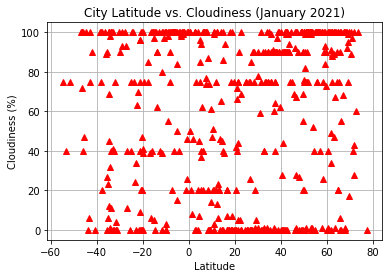

In [15]:
fig,ax = plt.subplots()
ax.grid()
plt.plot(lat, cloudy, 'r^')
plt.title('City Latitude vs. Cloudiness (January 2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

The majority of cities trends toward 100% or 0% cloudy. 

## Latitude vs. Wind Speed Plot

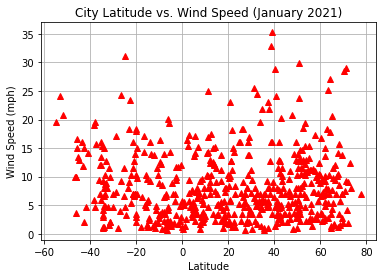

In [16]:
fig,ax = plt.subplots()
ax.grid()
plt.plot(lat, wind, 'r^')
plt.title('City Latitude vs. Wind Speed (January 2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

The majority of cities have a wind speed of 20 mph and below.  The distance from the equator does not impact wind speed.

## Linear Regression

In [98]:
city_df = pd.DataFrame({"City": unique_city, 
                        "Cloudiness": cloudy, 
                        "Country": country, 
                        "Date": date, 
                        "Humidity":humidity,
                        "Lat": lat,
                        "Lng": lng,
                        "Max Temp": temp,
                        "Wind Speed": wind
                                         })

city_df = city_df.rename_axis('City ID')

city_df.head(50)


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Winnemucca,44,US,1611710713,80,40.9730,-117.7357,27.00,5.01
1,Ushuaia,75,AR,1611710461,75,-54.8000,-68.3000,39.20,19.57
2,Bluff,100,NZ,1611710713,50,-46.6000,168.3333,75.99,10.00
3,Castro,100,BR,1611710713,93,-24.7911,-50.0119,65.75,4.72
4,Seoul,0,KR,1611710609,44,37.5683,126.9778,37.40,8.05
5,Hermanus,69,ZA,1611710517,93,-34.4187,19.2345,62.01,3.33
6,Bengkulu,100,ID,1611710442,81,-3.8004,102.2655,76.10,1.90
7,Narsaq,0,GL,1611710667,78,60.9167,-46.0500,9.72,9.46
8,Busselton,11,AU,1611710714,71,-33.6500,115.3333,66.00,7.00


In [99]:
north = city_df.loc[city_df['Lat'] >=0]
south = city_df.loc[city_df['Lat'] <0]
type(city_df)

pandas.core.frame.DataFrame

In [121]:
len(north['Lat']), len(temp)

(401, 571)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

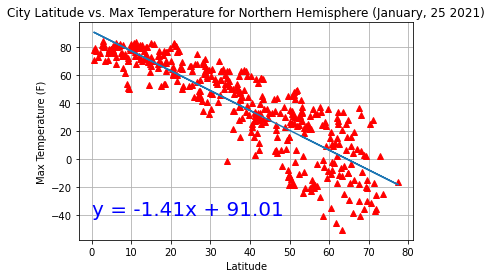

In [138]:
fig,ax = plt.subplots()
ax.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress( north['Lat'], north['Max Temp'])

plt.plot( north['Lat'], north['Max Temp'], 'r^')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#adds 'y' statement, location, and size to scatter plot
plt.annotate(line_eq,(0,-40),fontsize=20,color="blue",)

#calculation for slope, creates slope line
regress_values = [i *  slope + intercept for i in  north['Lat']] 

#colors slope line
plt.plot( north['Lat'], regress_values)
#labels chart
plt.title('City Latitude vs. Max Temperature for Northern Hemisphere (January, 25 2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

This chart shows the correlation between city temperature and distance to/from the equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

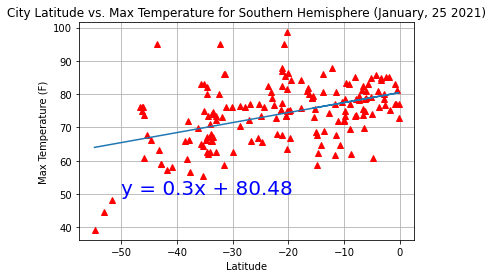

In [135]:
fig,ax = plt.subplots()
ax.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress( south['Lat'], south['Max Temp'])

plt.plot( south['Lat'], south['Max Temp'], 'r^')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#adds 'y' statement, location, and size to scatter plot
plt.annotate(line_eq,(-50,50),fontsize=20,color="blue",)

#calculation for slope, creates slope line
regress_values = [i *  slope + intercept for i in  south['Lat']] 

#colors slope line
plt.plot( south['Lat'], regress_values)
#labels chart
plt.title('City Latitude vs. Max Temperature for Southern Hemisphere (January, 25 2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

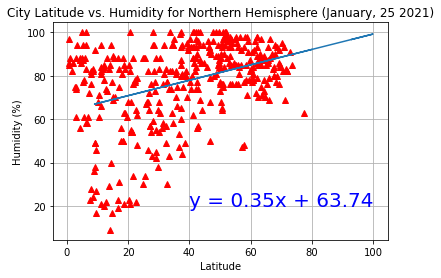

In [144]:
fig,ax = plt.subplots()
ax.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress( north['Lat'], north['Humidity'])

plt.plot( north['Lat'], north['Humidity'], 'r^')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#adds 'y' statement, location, and size to scatter plot
plt.annotate(line_eq,(40,20),fontsize=20,color="blue",)

#calculation for slope, creates slope line
regress_values = [i *  slope + intercept for i in  north['Humidity']] 

#colors slope line
plt.plot( north['Humidity'], regress_values)
#labels chart
plt.title('City Latitude vs. Humidity for Northern Hemisphere (January, 25 2021)')
plt.xlabel('Latitude')

plt.ylabel('Humidity (%)')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

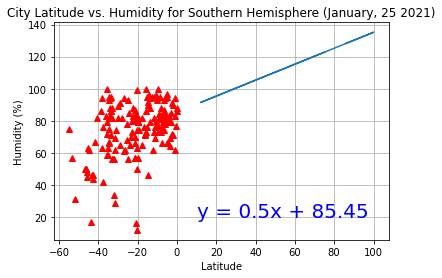

In [147]:
fig,ax = plt.subplots()
ax.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress( south['Lat'], south['Humidity'])

plt.plot( south['Lat'], south['Humidity'], 'r^')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#adds 'y' statement, location, and size to scatter plot
plt.annotate(line_eq,(10,20),fontsize=20,color="blue",)

#calculation for slope, creates slope line
regress_values = [i *  slope + intercept for i in  south['Humidity']] 

#colors slope line
plt.plot( south['Humidity'], regress_values)
#labels chart
plt.title('City Latitude vs. Humidity for Southern Hemisphere (January, 25 2021)')
plt.xlabel('Latitude')

plt.ylabel('Humidity (%)')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

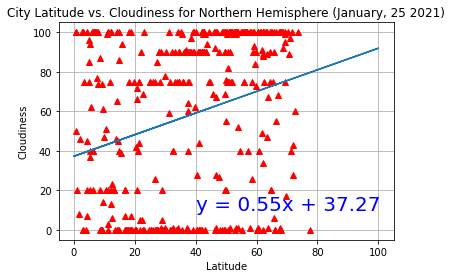

In [149]:
fig,ax = plt.subplots()
ax.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress( north['Lat'], north['Cloudiness'])

plt.plot( north['Lat'], north['Cloudiness'], 'r^')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#adds 'y' statement, location, and size to scatter plot
plt.annotate(line_eq,(40,10),fontsize=20,color="blue",)

#calculation for slope, creates slope line
regress_values = [i *  slope + intercept for i in  north['Cloudiness']] 

#colors slope line
plt.plot( north['Cloudiness'], regress_values)
#labels chart
plt.title('City Latitude vs. Cloudiness for Northern Hemisphere (January, 25 2021)')
plt.xlabel('Latitude')

plt.ylabel('Cloudiness')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

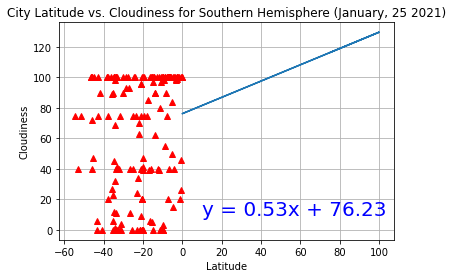

In [152]:
fig,ax = plt.subplots()
ax.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress( south['Lat'], south['Cloudiness'])

plt.plot( south['Lat'], south['Cloudiness'], 'r^')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#adds 'y' statement, location, and size to scatter plot
plt.annotate(line_eq,(10,10),fontsize=20,color="blue",)

#calculation for slope, creates slope line
regress_values = [i *  slope + intercept for i in  south['Cloudiness']] 

#colors slope line
plt.plot( south['Cloudiness'], regress_values)
#labels chart
plt.title('City Latitude vs. Cloudiness for Southern Hemisphere (January, 25 2021)')
plt.xlabel('Latitude')

plt.ylabel('Cloudiness')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

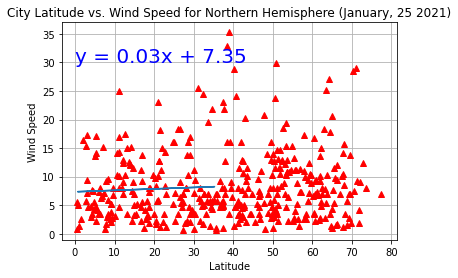

In [154]:
fig,ax = plt.subplots()
ax.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress( north['Lat'], north['Wind Speed'])

plt.plot( north['Lat'], north['Wind Speed'], 'r^')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#adds 'y' statement, location, and size to scatter plot
plt.annotate(line_eq,(0,30),fontsize=20,color="blue",)

#calculation for slope, creates slope line
regress_values = [i *  slope + intercept for i in  north['Wind Speed']] 

#colors slope line
plt.plot( north['Wind Speed'], regress_values)
#labels chart
plt.title('City Latitude vs. Wind Speed for Northern Hemisphere (January, 25 2021)')
plt.xlabel('Latitude')

plt.ylabel('Wind Speed')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

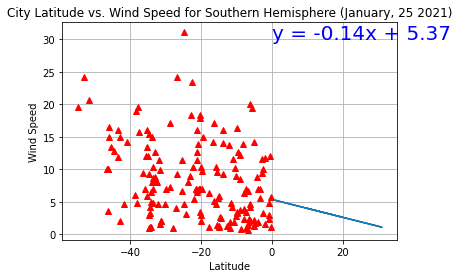

In [155]:
fig,ax = plt.subplots()
ax.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress( south['Lat'], south['Wind Speed'])

plt.plot( south['Lat'], south['Wind Speed'], 'r^')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#adds 'y' statement, location, and size to scatter plot
plt.annotate(line_eq,(-20,0),fontsize=20,color="blue",)

#calculation for slope, creates slope line
regress_values = [i *  slope + intercept for i in  south['Wind Speed']] 

#colors slope line
plt.plot( south['Wind Speed'], regress_values)
#labels chart
plt.title('City Latitude vs. Wind Speed for Southern Hemisphere (January, 25 2021)')
plt.xlabel('Latitude')

plt.ylabel('Wind Speed')

plt.show()